In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(url)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [6]:
#Lineaer Regression
from sklearn.linear_model import LinearRegression

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [7]:
lm = LinearRegression()
lm

LinearRegression()

In [9]:
X =df[['highway-mpg']]
Y=df['price']

lm.fit(X,Y)

LinearRegression()

In [11]:
Yhat = lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [12]:
lm.intercept_

38423.3058581574

In [13]:
lm.coef_

array([-821.73337832])

In [ ]:
# -> price = 38423.31 - 821.73 x highway-mpg

In [ ]:
#Multiple Linear Regression

In [15]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
#train the data 
lm.fit(Z, df['price'])
lm.intercept_

-15806.624626329198

In [16]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [ ]:
# -> Price = -15678.742628061467 + 53.49574423 x horsepower + 4.70770099 x curb-weight + 81.53026382 x engine-size + 36.05748882 x highway-mpg

In [ ]:
# Model Evaluation using Visualization

In [17]:
# import the visualization package: seaborn
mport seaborn as sns
%matplotlib inline 

(0.0, 48194.49640471279)

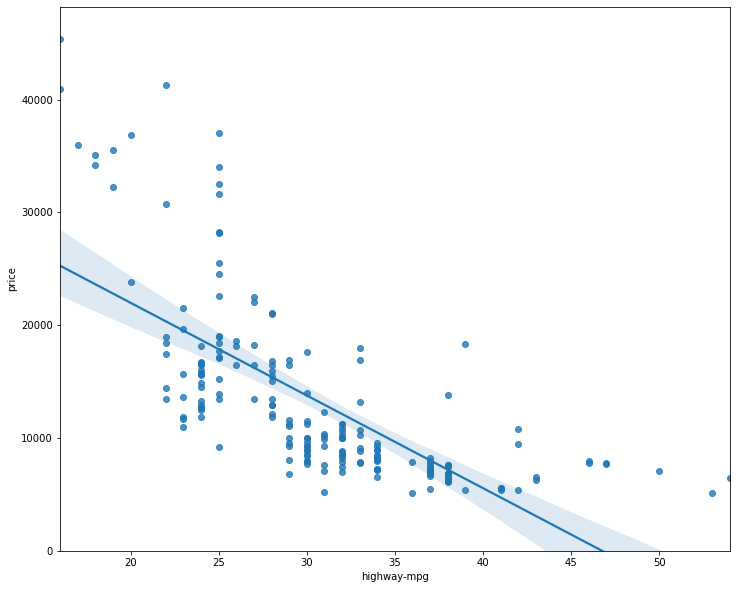

In [18]:
#Let's visualize highway-mpg as potential predictor variable of price:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0, )

(0.0, 47414.1)

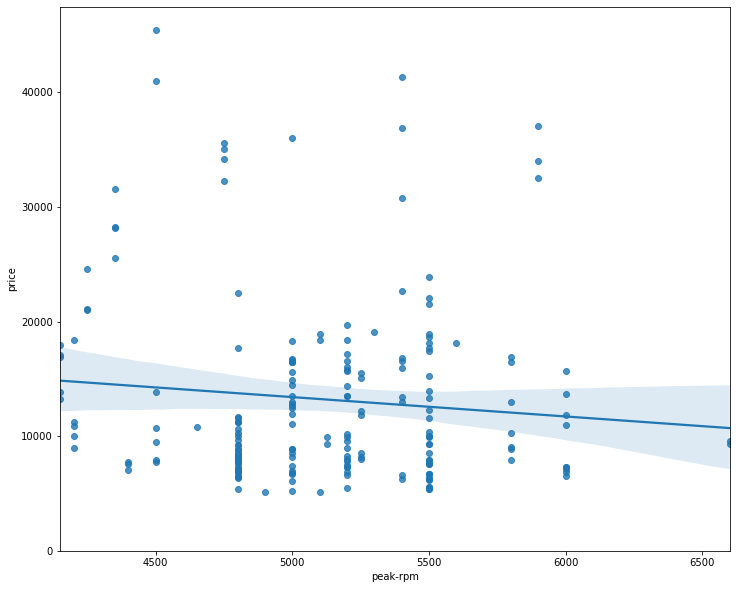

In [19]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [20]:
df[["peak-rpm","highway-mpg", "price"]].corr()

#highway-mpg -0.704.. and peak-rpm -0.10... 
#-> highway-mpg has more strong correlation with price 

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


/Users/jeongdahye/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


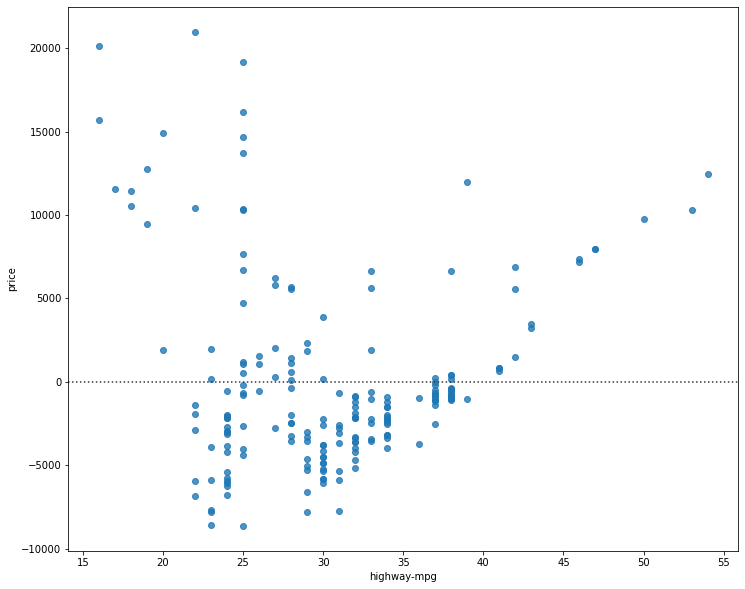

In [23]:
#Residual plot 
width = 12 
height = 10 
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'],df['price'])
plt.show()

#the result: residuals are not randomly spreaded -> non-linear model is more appropriate 

/Users/jeongdahye/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/jeongdahye/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


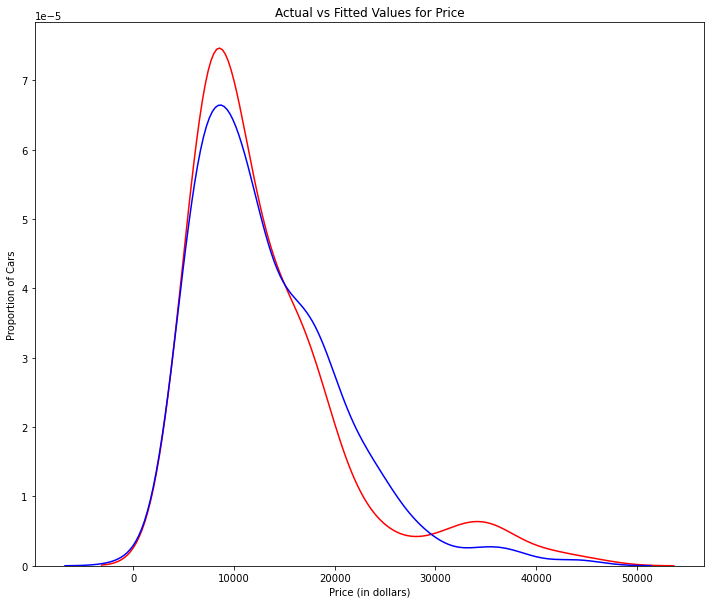

In [26]:
#Distribution plot

#make a prediction
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Y_hat = lm.predict(Z)

plt.figure(figsize=(width, height))

ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values", ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [30]:
#Polynomial Regression

#plot the data 
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)
# y = linspace( x1,x2 , n ) generates n points. The spacing between the points is (x2-x1)/(n-1
  
    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()  #get current axe
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()  #get current feature
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [31]:
x = df['highway-mpg']
y = df['price']

In [35]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x,y,3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


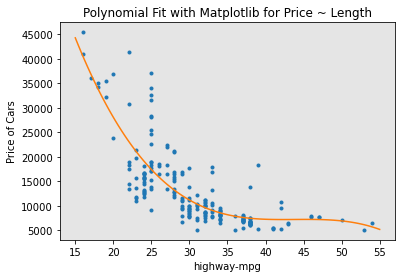

In [36]:
PlotPolly(p, x, y, 'highway-mpg')

In [37]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


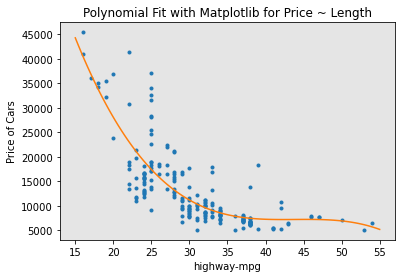

In [38]:
# Create 11 order polynomial model with the variables x and y from above?
f1=np.polyfit(x,y,11)
p1=np.poly1d(f)
print(p1)
PlotPolly(p1, x, y, 'highway-mpg')

In [39]:
#Multivariable Polynomial 

from sklearn.preprocessing import PolynomialFeatures

In [40]:
#create PolynomialFeature object of degree 2 
pr = PolynomialFeatures(degree = 2)
pr

PolynomialFeatures()

In [43]:
Z_pr=pr.fit_transform(Z)
Z.shape    # The original data is of 201 samples and 4 features
Z_pr.shape   # after the transformation, there 201 samples and 15 features

(201, 15)

In [49]:
#Pipeline 

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)),('model', LinearRegression())]

#input the list as an argument to the Pipeline constructor 
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [51]:
#normalize the data 
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [52]:
#normalize , perform a transfomr and produce prediction

ypipe = pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [53]:
#Create a pipeline that Standardizes the data, then perform prediction using a linear regression model using the features Z and targets y

Input = [('scale', StandardScaler()), ('model', LinearRegression())]

pipe = Pipeline(Input)
pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

In [55]:
#Model 1 SImple Linear Regression 

#X = df([['highway-mpg']])
#Y = df['price']

#R^2
lm.fit(X,Y)
print('The R-square is:', lm.score(X,Y))

The R-square is: 0.4965911884339176


In [58]:
#MSE

#predict the output 
Yhat = lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

from sklearn.metrics import mean_squared_error

mse=mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]
The mean square error of price and predicted value is:  31635042.944639888


In [59]:
# Model 2: Multiple Linear Regression
#R^2
lm.fit(Z, df['price'])
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [60]:
Y_predict_multifit = lm.predict(Z)

print('The mean square error of price and predicted value using multifit is: ', mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


In [61]:
# Model 3: Polynomial Fit
#R^2

from sklearn.metrics import r2_score

r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)


The R-square value is:  0.6741946663906522


In [62]:
# Model 3: Polynomial Fit - MSE 
mean_squared_error(df['price'], p(x))

20474146.426361203

In [63]:
#Part 5: Prediction and Decision Making

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

new_input = np.arange(1, 100, 1).reshape(-1,1)
#reshape(-1, 1)
# when you use -1 in reshape, the length of the dimenstion is determined by inferring from the other dimensions. For instance, if shape(2,3) -> it has 6 values in the array. -> reshape(-1,1)-> make sure th keep all the values in 1 column -> shape(6,1) Another example, if applying reshapre(1,-1)-> all the values in 1 row-> shape(1,6)
#arange(1, 100, 1) : start , end, term 


In [64]:
lm.fit(X,Y)
lm

LinearRegression()

In [65]:
yhat=lm.predict(new_input)
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

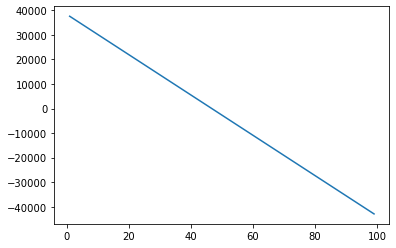

In [66]:
plt.plot(new_input, yhat)
plt.show()